In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
file_path = '/users/sumitttt/downloads/Emp_Data_mthly.csv'

# Read the CSV file into a DataFrame
#df = pd.read_csv(file_path, parse_dates=['date'])
df = pd.read_csv(file_path, dtype={'column_3': float, 'column_4': float})
# Display the first few rows of the DataFrame
print(df.head())

   PERMNO        date  SHRCD     PRC        RET  SHROUT       RETX    sprtrn
0   10001  1999-01-29   11.0  9.6250   0.000000  2421.0   0.000000  0.041009
1   10001  1999-02-26   11.0  8.7500  -0.090909  2421.0  -0.090909 -0.032283
2   10001  1999-03-31   11.0  8.7500   0.013143  2421.0   0.000000  0.038794
3   10001  1999-04-30   11.0  8.8750   0.014286  2421.0   0.014286  0.037944
4   10001  1999-05-28   11.0 -8.6875  -0.021127  2421.0  -0.021127 -0.024970


In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

In [3]:
df = df[df['SHRCD'] == 11]
df.drop(columns=['SHRCD'], inplace=True)
df.describe()

,PERMNO,PRC,SHROUT,sprtrn
count,1365119.0000,1328123.0000,1363825.0000,1365119.0000
mean,63139.9719,69.6277,103584.6219,0.0046
std,29848.6081,3413.0299,415190.8953,0.0446
min,10001.0000,-1457.5000,9.0000,-0.1694
25%,29612.0000,4.7500,11437.0000,-0.0201
50%,79198.0000,14.1000,28271.0000,0.0094
75%,86778.0000,31.1100,67848.0000,0.0342
max,93436.0000,546725.0000,29206400.0000,0.1268


In [4]:
df.drop(columns=['RETX'], inplace=True)

In [5]:
columns_to_convert = ['RET','sprtrn']

# Convert specified columns to numeric, replacing non-numeric values with NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Replace NaN with 0 in the specified columns
df[columns_to_convert] = df[columns_to_convert].fillna(0)
df

,PERMNO,date,PRC,RET,SHROUT,sprtrn
0,10001,1999-01-29,9.6250,0.0000,2421.0000,0.0410
1,10001,1999-02-26,8.7500,-0.0909,2421.0000,-0.0323
2,10001,1999-03-31,8.7500,0.0131,2421.0000,0.0388
3,10001,1999-04-30,8.8750,0.0143,2421.0000,0.0379
4,10001,1999-05-28,-8.6875,-0.0211,2421.0000,-0.0250
...,...,...,...,...,...,...
2275193,93436,2023-08-31,258.0800,-0.0350,3173994.0000,-0.0177
2275194,93436,2023-09-29,250.2200,-0.0305,3179000.0000,-0.0487
2275195,93436,2023-10-31,200.8400,-0.1973,3178921.0000,-0.0220
2275196,93436,2023-11-30,240.0800,0.1954,3178921.0000,0.0892


In [6]:
df['PRC']=abs(df['PRC'])
df['MKTCAP']=df['SHROUT']*df['PRC']
df.describe()

,PERMNO,PRC,RET,SHROUT,sprtrn,MKTCAP
count,1365119.0000,1328123.0000,1365119.0000,1363825.0000,1365119.0000,1328123.0000
mean,63139.9719,70.5184,0.0097,103584.6219,0.0046,4674211.1135
std,29848.6081,3413.0116,0.1996,415190.8953,0.0446,30941050.3989
min,10001.0000,0.0105,-0.9957,9.0000,-0.1694,83.5500
25%,29612.0000,5.3300,-0.0678,11437.0000,-0.0201,74960.1600
50%,79198.0000,14.5275,0.0000,28271.0000,0.0094,336450.8000
75%,86778.0000,31.3400,0.0688,67848.0000,0.0342,1629526.9900
max,93436.0000,546725.0000,19.8836,29206400.0000,0.1268,3071344876.4000


In [7]:
df_mc = df.dropna(subset=['MKTCAP'])

df_mc = df_mc.sort_values(by='MKTCAP', ascending=False)

df_mc['mc_pct'] = (df_mc['MKTCAP'].rank(pct=True) * 100)

df_mc

,PERMNO,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct
259841,14593,2023-07-31,196.4500,0.0128,15634232.0000,0.0311,3071344876.4000,100.0000
259840,14593,2023-06-30,193.9700,0.0943,15647868.0000,0.0647,3035216955.9600,99.9999
259846,14593,2023-12-29,192.5300,0.0136,15552752.0000,0.0442,2994371342.5600,99.9998
259845,14593,2023-11-30,189.9500,0.1137,15552752.0000,0.0892,2954245242.4000,99.9998
259842,14593,2023-08-31,187.8700,-0.0425,15634232.0000,-0.0177,2937203165.8400,99.9997
...,...,...,...,...,...,...,...,...
2014750,91021,2019-08-30,15.3400,0.5733,9.0000,-0.0181,138.0600,0.0004
2014748,91021,2019-06-28,0.2423,-0.0308,443.0000,0.0689,107.3389,0.0003
1137225,79443,2002-04-30,0.0600,-0.5556,1671.0000,-0.0614,100.2600,0.0002
2014749,91021,2019-07-31,0.1950,-0.1952,453.0000,0.0131,88.3350,0.0002


In [8]:
df_mc['date']=pd.to_datetime(df_mc['date'])
end_q = df_mc['date'].dt.month.isin([3, 6, 9, 12])
df_mc_end_q =df_mc[end_q]

df_mc_end_q = df_mc_end_q[df_mc_end_q['mc_pct'] > 35]

df_mc_end_q['month'] = df_mc_end_q['date'].dt.month
df_mc_end_q['year'] = df_mc_end_q['date'].dt.year

df_mc_end_q = df_mc_end_q[['PERMNO', 'month', 'year']]

df_mc_end_q

,PERMNO,month,year
259840,14593,6,2023
259846,14593,12,2023
259822,14593,12,2021
259825,14593,3,2022
4548,10107,12,2023
...,...,...,...
247816,14447,6,2015
1973320,90682,12,2019
456728,18075,12,2005
1467593,85361,3,2002


In [9]:

df_mc
df_mc['month'] = df_mc['date'].dt.month
df_mc['year'] = df_mc['date'].dt.year
df_mc

conditions = [
    (df_mc['month'] == 4) | (df_mc['month'] == 5) | (df_mc['month'] == 6),
    (df_mc['month'] == 7) | (df_mc['month'] == 8) | (df_mc['month'] == 9),
    (df_mc['month'] == 10) | (df_mc['month'] == 11) | (df_mc['month'] == 12),
    (df_mc['month'] == 1) | (df_mc['month'] == 2) | (df_mc['month'] == 3),
    
]
values = [3, 6, 9, 12]

df_mc['priorq_m'] = np.select(conditions, values, default=df_mc['month'])

df_mc['priorq_y'] = np.where(df_mc['priorq_m']==12, df_mc['year']-1,df_mc['year'])

df_mc.drop(columns=['month', 'year'], inplace=True)

df_mc = df_mc.rename(columns={'priorq_m': 'month'})
df_mc = df_mc.rename(columns={'priorq_y': 'year'})

df_mc


,PERMNO,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct,month,year
259841,14593,2023-07-31,196.4500,0.0128,15634232.0000,0.0311,3071344876.4000,100.0000,6,2023
259840,14593,2023-06-30,193.9700,0.0943,15647868.0000,0.0647,3035216955.9600,99.9999,3,2023
259846,14593,2023-12-29,192.5300,0.0136,15552752.0000,0.0442,2994371342.5600,99.9998,9,2023
259845,14593,2023-11-30,189.9500,0.1137,15552752.0000,0.0892,2954245242.4000,99.9998,9,2023
259842,14593,2023-08-31,187.8700,-0.0425,15634232.0000,-0.0177,2937203165.8400,99.9997,6,2023
...,...,...,...,...,...,...,...,...,...,...
2014750,91021,2019-08-30,15.3400,0.5733,9.0000,-0.0181,138.0600,0.0004,6,2019
2014748,91021,2019-06-28,0.2423,-0.0308,443.0000,0.0689,107.3389,0.0003,3,2019
1137225,79443,2002-04-30,0.0600,-0.5556,1671.0000,-0.0614,100.2600,0.0002,3,2002
2014749,91021,2019-07-31,0.1950,-0.1952,453.0000,0.0131,88.3350,0.0002,6,2019


In [10]:
df_size_filter = pd.merge(df_mc_end_q, df_mc, on=['PERMNO', 'month', 'year'], how='inner')
df_size_filter.describe()

,PERMNO,month,year,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct
count,846032.0000,846032.0000,846032.0000,846032,846032.0000,846032.0000,846032.0000,846032.0000,846032.0000,846032.0000
mean,61069.1238,7.4486,2010.7964,2011-07-31 01:54:05.153847808,106.1299,0.0076,154534.1873,0.0049,7244084.9875,67.4274
min,10002.0000,3.0000,1999.0000,1999-04-30 00:00:00,0.0751,-0.9813,207.0000,-0.1694,2988.2600,0.5459
25%,24248.0000,3.0000,2005.0000,2005-04-29 00:00:00,12.5200,-0.0608,24505.0000,-0.0198,361623.9425,51.3058
50%,77378.0000,6.0000,2011.0000,2011-05-31 00:00:00,24.0100,0.0050,47708.0000,0.0100,986806.1850,67.6905
75%,86719.0000,9.0000,2017.0000,2017-12-29 00:00:00,42.9000,0.0705,110711.0000,0.0325,3367582.8250,83.9005
max,93436.0000,12.0000,2023.0000,2023-12-29 00:00:00,546725.0000,19.8836,29206400.0000,0.1268,3071344876.4000,100.0000
std,30266.6278,3.3401,7.2668,NaN,4273.8481,0.1532,518902.7549,0.0440,38479800.4232,19.1059


In [11]:
df_size_filter = df_size_filter.drop(columns=['month','year'])
df_size_filter['month'] = df_size_filter['date'].dt.month
df_size_filter['year'] = df_size_filter['date'].dt.year
df_size_filter

,PERMNO,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct,month,year
0,14593,2023-07-31,196.4500,0.0128,15634232.0000,0.0311,3071344876.4000,100.0000,7,2023
1,14593,2023-08-31,187.8700,-0.0425,15634232.0000,-0.0177,2937203165.8400,99.9997,8,2023
2,14593,2023-09-29,171.2100,-0.0887,15550061.0000,-0.0487,2662326099.3106,99.9989,9,2023
3,14593,2022-01-31,174.7800,-0.0157,16319441.0000,-0.0526,2852311897.9800,99.9995,1,2022
4,14593,2022-03-31,174.6100,0.0575,16207568.0000,0.0358,2830003448.4800,99.9995,3,2022
...,...,...,...,...,...,...,...,...,...,...
846027,85361,2002-05-31,15.9300,0.3387,11707.0000,-0.0091,186492.5100,39.5600,5,2002
846028,85361,2002-04-30,11.9000,-0.0182,11677.0000,-0.0614,138956.3000,34.6852,4,2002
846029,29145,2002-11-29,10.5400,0.0540,17939.0000,0.0571,189077.0600,39.7860,11,2002
846030,29145,2002-10-31,10.0000,0.2658,17939.0000,0.0864,179390.0000,38.9205,10,2002


In [12]:
import pandas as pd
file_path = '/users/sumitttt/downloads/Permno_vars.csv'

# Read the CSV file into a DataFrame
variance = pd.read_csv(file_path, parse_dates=['date'])
#df = pd.read_csv(file_path, dtype={'column_3': float, 'column_4': float})
# Display the first few rows of the DataFrame
variance.head()

/var/folders/91/z4s2gqcn2017kmxtz290cnkw0000gn/T/ipykernel_64139/8734392.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  variance = pd.read_csv(file_path, parse_dates=['date'])


,permno,date,var
0,10001,1999-02-26,0.0009
1,10001,1999-03-31,0.0008
2,10001,1999-04-30,0.0005
3,10001,1999-05-28,0.0006
4,10001,1999-06-30,0.0006


In [13]:
variance['date'] = pd.to_datetime(variance['date'])
variance
variance['month'] = variance['date'].dt.month
variance['year'] = variance['date'].dt.year

variance

,permno,date,var,month,year
0,10001,1999-02-26,0.0009,2,1999
1,10001,1999-03-31,0.0008,3,1999
2,10001,1999-04-30,0.0005,4,1999
3,10001,1999-05-28,0.0006,5,1999
4,10001,1999-06-30,0.0006,6,1999
...,...,...,...,...,...
1320495,93436,2023-07-31,0.0009,7,2023
1320496,93436,2023-08-31,0.0010,8,2023
1320497,93436,2023-09-29,0.0010,9,2023
1320498,93436,2023-10-31,0.0010,10,2023


In [14]:
variance['month'] += 1
variance.loc[variance['month'] == 13, 'year'] += 1
variance.loc[variance['month'] == 13, 'month'] = 1
variance = variance.drop(columns=['date'])
variance = variance.rename(columns={'permno': 'PERMNO'})
variance

,PERMNO,var,month,year
0,10001,0.0009,3,1999
1,10001,0.0008,4,1999
2,10001,0.0005,5,1999
3,10001,0.0006,6,1999
4,10001,0.0006,7,1999
...,...,...,...,...
1320495,93436,0.0009,8,2023
1320496,93436,0.0010,9,2023
1320497,93436,0.0010,10,2023
1320498,93436,0.0010,11,2023


In [15]:
var_added = pd.merge(df_size_filter, variance, on=['month', 'year', 'PERMNO'], how='inner')
var_added

,PERMNO,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct,month,year,var
0,14593,2023-07-31,196.4500,0.0128,15634232.0000,0.0311,3071344876.4000,100.0000,7,2023,0.0001
1,14593,2023-08-31,187.8700,-0.0425,15634232.0000,-0.0177,2937203165.8400,99.9997,8,2023,0.0001
2,14593,2023-09-29,171.2100,-0.0887,15550061.0000,-0.0487,2662326099.3106,99.9989,9,2023,0.0001
3,14593,2022-01-31,174.7800,-0.0157,16319441.0000,-0.0526,2852311897.9800,99.9995,1,2022,0.0002
4,14593,2022-03-31,174.6100,0.0575,16207568.0000,0.0358,2830003448.4800,99.9995,3,2022,0.0004
...,...,...,...,...,...,...,...,...,...,...,...
844581,85361,2002-05-31,15.9300,0.3387,11707.0000,-0.0091,186492.5100,39.5600,5,2002,0.0004
844582,85361,2002-04-30,11.9000,-0.0182,11677.0000,-0.0614,138956.3000,34.6852,4,2002,0.0008
844583,29145,2002-11-29,10.5400,0.0540,17939.0000,0.0571,189077.0600,39.7860,11,2002,0.0018
844584,29145,2002-10-31,10.0000,0.2658,17939.0000,0.0864,179390.0000,38.9205,10,2002,0.0011


In [16]:
num_portfolios = 5

grouped = var_added.groupby('date')

var_added['portfolio'] = grouped['var'].transform(lambda x: pd.qcut(x, num_portfolios, labels=False) + 1)

var_added

,PERMNO,date,PRC,RET,SHROUT,sprtrn,MKTCAP,mc_pct,month,year,var,portfolio
0,14593,2023-07-31,196.4500,0.0128,15634232.0000,0.0311,3071344876.4000,100.0000,7,2023,0.0001,1
1,14593,2023-08-31,187.8700,-0.0425,15634232.0000,-0.0177,2937203165.8400,99.9997,8,2023,0.0001,1
2,14593,2023-09-29,171.2100,-0.0887,15550061.0000,-0.0487,2662326099.3106,99.9989,9,2023,0.0001,1
3,14593,2022-01-31,174.7800,-0.0157,16319441.0000,-0.0526,2852311897.9800,99.9995,1,2022,0.0002,1
4,14593,2022-03-31,174.6100,0.0575,16207568.0000,0.0358,2830003448.4800,99.9995,3,2022,0.0004,2
...,...,...,...,...,...,...,...,...,...,...,...,...
844581,85361,2002-05-31,15.9300,0.3387,11707.0000,-0.0091,186492.5100,39.5600,5,2002,0.0004,2
844582,85361,2002-04-30,11.9000,-0.0182,11677.0000,-0.0614,138956.3000,34.6852,4,2002,0.0008,3
844583,29145,2002-11-29,10.5400,0.0540,17939.0000,0.0571,189077.0600,39.7860,11,2002,0.0018,4
844584,29145,2002-10-31,10.0000,0.2658,17939.0000,0.0864,179390.0000,38.9205,10,2002,0.0011,3


In [17]:
var_added.groupby('portfolio')['RET'].describe()

,count,mean,std,min,25%,50%,75%,max
portfolio,,,,,,,,
1,169036.0000,0.0095,0.0755,-0.9350,-0.0279,0.0073,0.0472,3.7126
2,168855.0000,0.0099,0.0990,-0.8863,-0.0455,0.0089,0.0635,1.4752
3,168858.0000,0.0099,0.1256,-0.8750,-0.0593,0.0073,0.0755,3.0017
4,168855.0000,0.0074,0.1655,-0.9246,-0.0810,0.0025,0.0893,4.0476
5,168982.0000,0.0013,0.2365,-0.9813,-0.1232,-0.0093,0.1042,16.2505


In [18]:
sharpe_ratio = var_added.groupby('portfolio')['RET'].mean()/ var_added.groupby('portfolio')['RET'].std() ##Assuming Rf is 0
for portfolio in sharpe_ratio.index:
    print(f"Portfolio {portfolio}:")
    print(f"The Monthly Sharpe ratio is: {sharpe_ratio[portfolio]: .4f}")
    print()


Portfolio 1:
The Monthly Sharpe ratio is:  0.1256

Portfolio 2:
The Monthly Sharpe ratio is:  0.0998

Portfolio 3:
The Monthly Sharpe ratio is:  0.0785

Portfolio 4:
The Monthly Sharpe ratio is:  0.0447

Portfolio 5:
The Monthly Sharpe ratio is:  0.0056



In [19]:
########var_added -- Now we sort by a second factor for our strategy. We are going to sort by size here. We take size, because larger cap stocks tend to be better organised business wise.
#####WE need to go back and grab size and re-import. The numbers we currently have are as of the end of month
##Let's clean out that info first###
var_added=var_added.drop(columns=['PRC','SHROUT','MKTCAP','mc_pct'])
var_added

,PERMNO,date,RET,sprtrn,month,year,var,portfolio
0,14593,2023-07-31,0.0128,0.0311,7,2023,0.0001,1
1,14593,2023-08-31,-0.0425,-0.0177,8,2023,0.0001,1
2,14593,2023-09-29,-0.0887,-0.0487,9,2023,0.0001,1
3,14593,2022-01-31,-0.0157,-0.0526,1,2022,0.0002,1
4,14593,2022-03-31,0.0575,0.0358,3,2022,0.0004,2
...,...,...,...,...,...,...,...,...
844581,85361,2002-05-31,0.3387,-0.0091,5,2002,0.0004,2
844582,85361,2002-04-30,-0.0182,-0.0614,4,2002,0.0008,3
844583,29145,2002-11-29,0.0540,0.0571,11,2002,0.0018,4
844584,29145,2002-10-31,0.2658,0.0864,10,2002,0.0011,3


In [20]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month'] += 1

# Increment year if month equals 13
df.loc[df['month'] == 13, 'year'] += 1

# Change month to 1 if it equals 13
df.loc[df['month'] == 13, 'month'] = 1

#drop date
df = df.drop(columns=['date','RET','SHROUT','sprtrn','PRC'])
df=df.dropna()
df


,PERMNO,MKTCAP,month,year
0,10001,23302.1250,2,1999
1,10001,21183.7500,3,1999
2,10001,21183.7500,4,1999
3,10001,21486.3750,5,1999
4,10001,21032.4375,6,1999
...,...,...,...,...
2275193,93436,819144339.7801,9,2023
2275194,93436,795449380.0000,10,2023
2275195,93436,638454493.6400,11,2023
2275196,93436,763195353.6800,12,2023


In [21]:
var_added_size = pd.merge(var_added, df, on=['month', 'year', 'PERMNO'], how='inner') ##Merging Mkt Cap with var filtered portfolio
var_added_size

,PERMNO,date,RET,sprtrn,month,year,var,portfolio,MKTCAP
0,14593,2023-07-31,0.0128,0.0311,7,2023,0.0001,1,3035216955.9600
1,14593,2023-08-31,-0.0425,-0.0177,8,2023,0.0001,1,3071344876.4000
2,14593,2023-09-29,-0.0887,-0.0487,9,2023,0.0001,1,2937203165.8400
3,14593,2022-01-31,-0.0157,-0.0526,1,2022,0.0002,1,2902368140.5592
4,14593,2022-03-31,0.0575,0.0358,3,2022,0.0004,2,2694666097.9200
...,...,...,...,...,...,...,...,...,...
844570,85361,2002-05-31,0.3387,-0.0091,5,2002,0.0004,2,138956.3000
844571,85361,2002-04-30,-0.0182,-0.0614,4,2002,0.0008,3,141719.1600
844572,29145,2002-11-29,0.0540,0.0571,11,2002,0.0018,4,179390.0000
844573,29145,2002-10-31,0.2658,0.0864,10,2002,0.0011,3,141718.1000


In [22]:
num_portfolios = 5

grouped = var_added_size.groupby('date')
var_added_size['port_size'] = grouped['MKTCAP'].transform(lambda x: pd.qcut(x, num_portfolios, labels=False) + 1)

var_added_size

var_added_size['combo'] = var_added_size['portfolio'].astype(str) + '/' + var_added_size['port_size'].astype(str)
var_added_size

,PERMNO,date,RET,sprtrn,month,year,var,portfolio,MKTCAP,port_size,combo
0,14593,2023-07-31,0.0128,0.0311,7,2023,0.0001,1,3035216955.9600,5,1/5
1,14593,2023-08-31,-0.0425,-0.0177,8,2023,0.0001,1,3071344876.4000,5,1/5
2,14593,2023-09-29,-0.0887,-0.0487,9,2023,0.0001,1,2937203165.8400,5,1/5
3,14593,2022-01-31,-0.0157,-0.0526,1,2022,0.0002,1,2902368140.5592,5,1/5
4,14593,2022-03-31,0.0575,0.0358,3,2022,0.0004,2,2694666097.9200,5,2/5
...,...,...,...,...,...,...,...,...,...,...,...
844570,85361,2002-05-31,0.3387,-0.0091,5,2002,0.0004,2,138956.3000,1,2/1
844571,85361,2002-04-30,-0.0182,-0.0614,4,2002,0.0008,3,141719.1600,1,3/1
844572,29145,2002-11-29,0.0540,0.0571,11,2002,0.0018,4,179390.0000,1,4/1
844573,29145,2002-10-31,0.2658,0.0864,10,2002,0.0011,3,141718.1000,1,3/1


In [23]:
var_added_size['port_ret'] = var_added_size.groupby(['date', 'combo'])['RET'].transform('mean')

var_added_size = var_added_size.sort_values(by=['date', 'combo'])
var_added_size.groupby('combo')['port_ret'].describe()

,count,mean,std,min,25%,50%,75%,max
combo,,,,,,,,
1/1,21214.0000,0.0083,0.0321,-0.1514,-0.0073,0.0064,0.0217,0.1312
1/2,16998.0000,0.0087,0.0397,-0.1971,-0.0098,0.0114,0.0340,0.1378
1/3,21789.0000,0.0110,0.0408,-0.1692,-0.0098,0.0154,0.0371,0.1357
1/4,39984.0000,0.0098,0.0390,-0.1540,-0.0126,0.0148,0.0317,0.1541
1/5,69049.0000,0.0094,0.0357,-0.1617,-0.0111,0.0136,0.0321,0.1211
2/1,19218.0000,0.0118,0.0480,-0.1979,-0.0147,0.0119,0.0438,0.1598
2/2,25924.0000,0.0114,0.0498,-0.2198,-0.0187,0.0165,0.0422,0.1458
2/3,34910.0000,0.0099,0.0514,-0.2186,-0.0174,0.0122,0.0425,0.1516
2/4,42987.0000,0.0104,0.0517,-0.2207,-0.0168,0.0148,0.0414,0.1717


/var/folders/91/z4s2gqcn2017kmxtz290cnkw0000gn/T/ipykernel_64139/94956003.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '101.03571190476191' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_averages.loc[monthly_averages.index[i], 'Equity'] = monthly_averages.loc[monthly_averages.index[i-1], 'Equity'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret'])
/var/folders/91/z4s2gqcn2017kmxtz290cnkw0000gn/T/ipykernel_64139/94956003.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '97.503' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_averages.loc[monthly_averages.index[i], 'SpyE'] = monthly_averages.loc[monthly_averages.index[i-1], 'SpyE'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'sprtrn'])


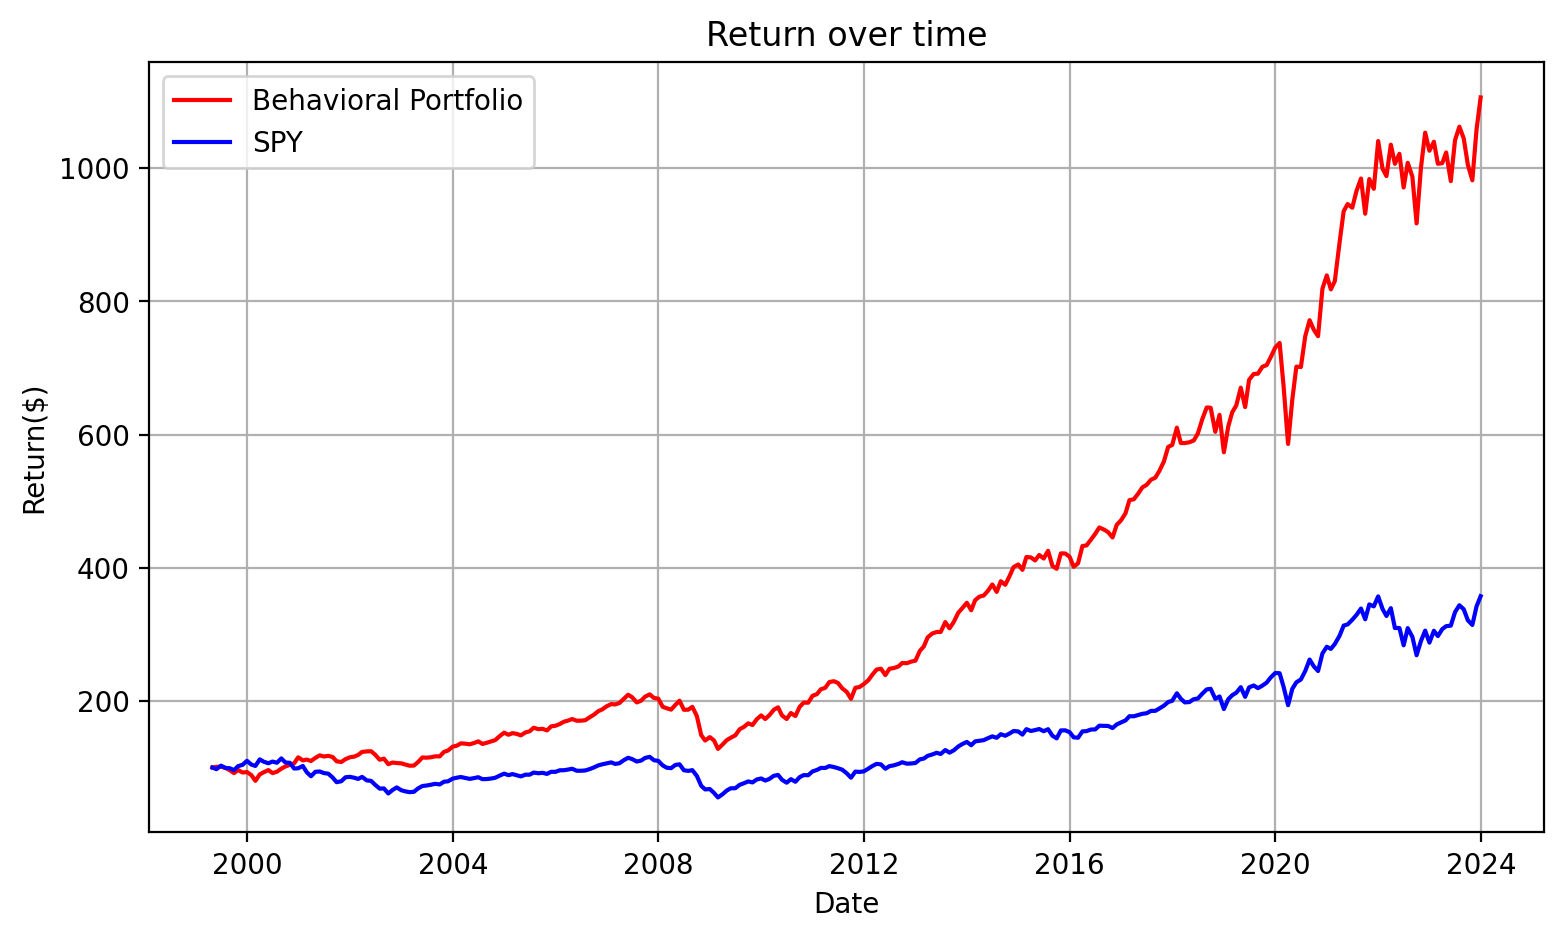

In [24]:
var_added_size = var_added_size[var_added_size['combo'] == '1/5' ] 
monthly_averages = var_added_size.drop_duplicates(subset=['date'])
monthly_averages = monthly_averages[['date', 'port_ret', 'sprtrn']]

monthly_averages['SpyE'] = 100
monthly_averages['Equity'] = 100
monthly_averages.set_index('date',inplace = True)

for i in range(1, len(monthly_averages)):
  monthly_averages.loc[monthly_averages.index[i], 'Equity'] = monthly_averages.loc[monthly_averages.index[i-1], 'Equity'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret'])

for i in range(1, len(monthly_averages)):
  monthly_averages.loc[monthly_averages.index[i], 'SpyE'] = monthly_averages.loc[monthly_averages.index[i-1], 'SpyE'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'sprtrn'])

plt.figure(figsize=(9, 5))
plt.plot(monthly_averages.index, monthly_averages['Equity'], label='Behavioral Portfolio', color='red')
plt.plot(monthly_averages.index, monthly_averages['SpyE'], label='SPY', color='blue')
plt.title('Return over time')
plt.xlabel('Date')
plt.ylabel('Return($)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
monthly_averages[['port_ret' , 'sprtrn']].describe()
monthly_averages['excess_return'] = monthly_averages['port_ret'] - monthly_averages['sprtrn']
print(f"The average monthly returns of the portfolio are: {monthly_averages['port_ret'].mean() * 100: .2f}% ")
print(f"The average monthly std dev of the portfolio is: {monthly_averages['port_ret'].std() * 100: .2f}%")

The average monthly returns of the portfolio are:  0.91% 
The average monthly std dev of the portfolio is:  3.75%


In [26]:
reg=smf.ols(formula='port_ret ~ sprtrn', data=monthly_averages)
results=reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               port_ret   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     793.7
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.23e-85
Time:                        23:25:09   Log-Likelihood:                 748.12
No. Observations:                 297   AIC:                            -1492.
Df Residuals:                     295   BIC:                            -1485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.001      4.538      0.000       0.003       0.007
sprtrn         0.7206      0.026     28.173      0.000       0.670       0.771
==============================================================================
Omnibus:                       36.458   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.580
Skew:                          -0.068   Prob(JB):                     1.15e-51
Kurtosis:                       7.352   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
Tracking_error = monthly_averages['excess_return'].std()
Sharpe_ratio = (monthly_averages['port_ret'].mean() * 12)/(monthly_averages['port_ret'].std() *(12**0.5)) 

print('The alpha is 0.0053')
print('The beta is 0.7182')
print(f"The Annualized Sharpe ratio is {Sharpe_ratio: .2f}")
print(f"The Information ratio is {Tracking_error: .2f}")



The alpha is 0.0053
The beta is 0.7182
The Annualized Sharpe ratio is  0.84
The Information ratio is  0.02


       port_ret  port_ret_ra
count  297.0000     291.0000
mean     0.0091       0.0012
std      0.0375       0.0056
min     -0.1617      -0.0430
25%     -0.0118      -0.0013
50%      0.0132       0.0016
75%      0.0323       0.0040
max      0.1211       0.0281


/var/folders/91/z4s2gqcn2017kmxtz290cnkw0000gn/T/ipykernel_64139/2955702135.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.43048814452379' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_averages.loc[monthly_averages.index[i], 'ra_eq'] = monthly_averages.loc[monthly_averages.index[i-1], 'ra_eq'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret_ra'])


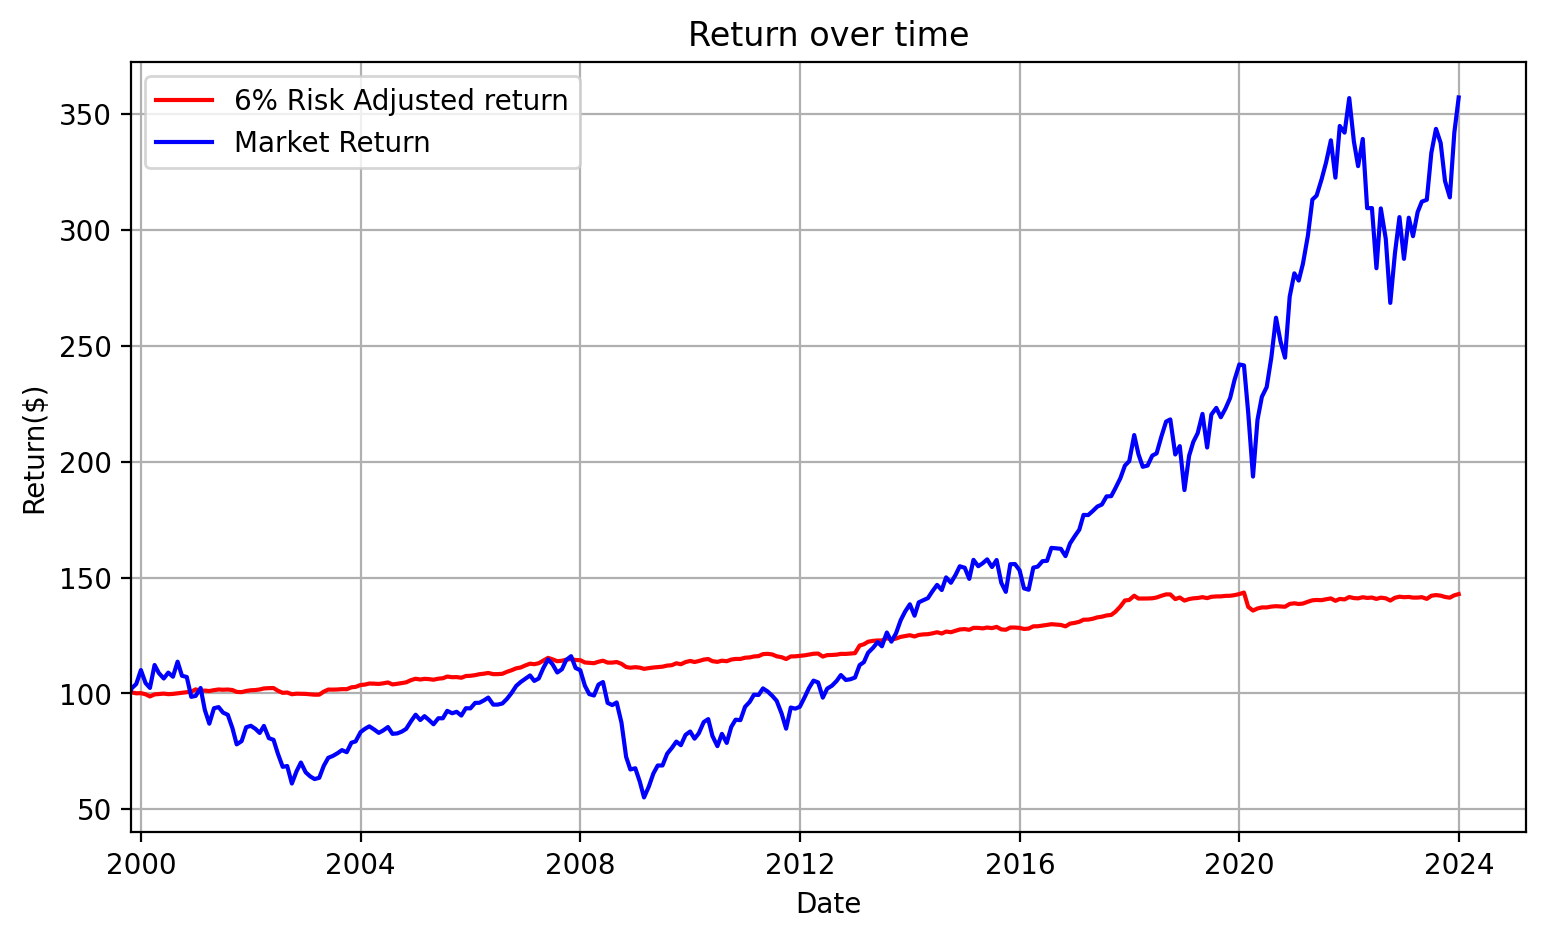

In [28]:
monthly_averages['risk'] = monthly_averages['port_ret'].rolling(window=6).std()
monthly_averages['vix_allocation']=0.06/(monthly_averages['risk']*(252**0.5)) 
monthly_averages['port_ret_ra']=monthly_averages['vix_allocation'].shift(1)*monthly_averages['port_ret'] 
print(monthly_averages[['port_ret', 'port_ret_ra']].describe())
monthly_averages['ra_eq'] = 100

for i in range(6, len(monthly_averages)):
  monthly_averages.loc[monthly_averages.index[i], 'ra_eq'] = monthly_averages.loc[monthly_averages.index[i-1], 'ra_eq'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret_ra'])

plt.figure(figsize=(9, 5))
plt.plot(monthly_averages.index, monthly_averages['ra_eq'], label='6% Risk Adjusted return', color='red')
plt.plot(monthly_averages.index, monthly_averages['SpyE'], label='Market Return', color='blue')
plt.xlim(monthly_averages.index[6])
plt.title('Return over time')
plt.xlabel('Date')
plt.ylabel('Return($)')
plt.legend()
plt.grid(True)
plt.show()


       port_ret  port_ret_ra
count  297.0000     291.0000
mean     0.0091       0.0012
std      0.0375       0.0056
min     -0.1617      -0.0430
25%     -0.0118      -0.0013
50%      0.0132       0.0016
75%      0.0323       0.0040
max      0.1211       0.0281


/var/folders/91/z4s2gqcn2017kmxtz290cnkw0000gn/T/ipykernel_64139/2390508428.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.17273136489628' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_averages.loc[monthly_averages.index[i], 'ra_eq2'] = monthly_averages.loc[monthly_averages.index[i-1], 'ra_eq2'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret_ra'])


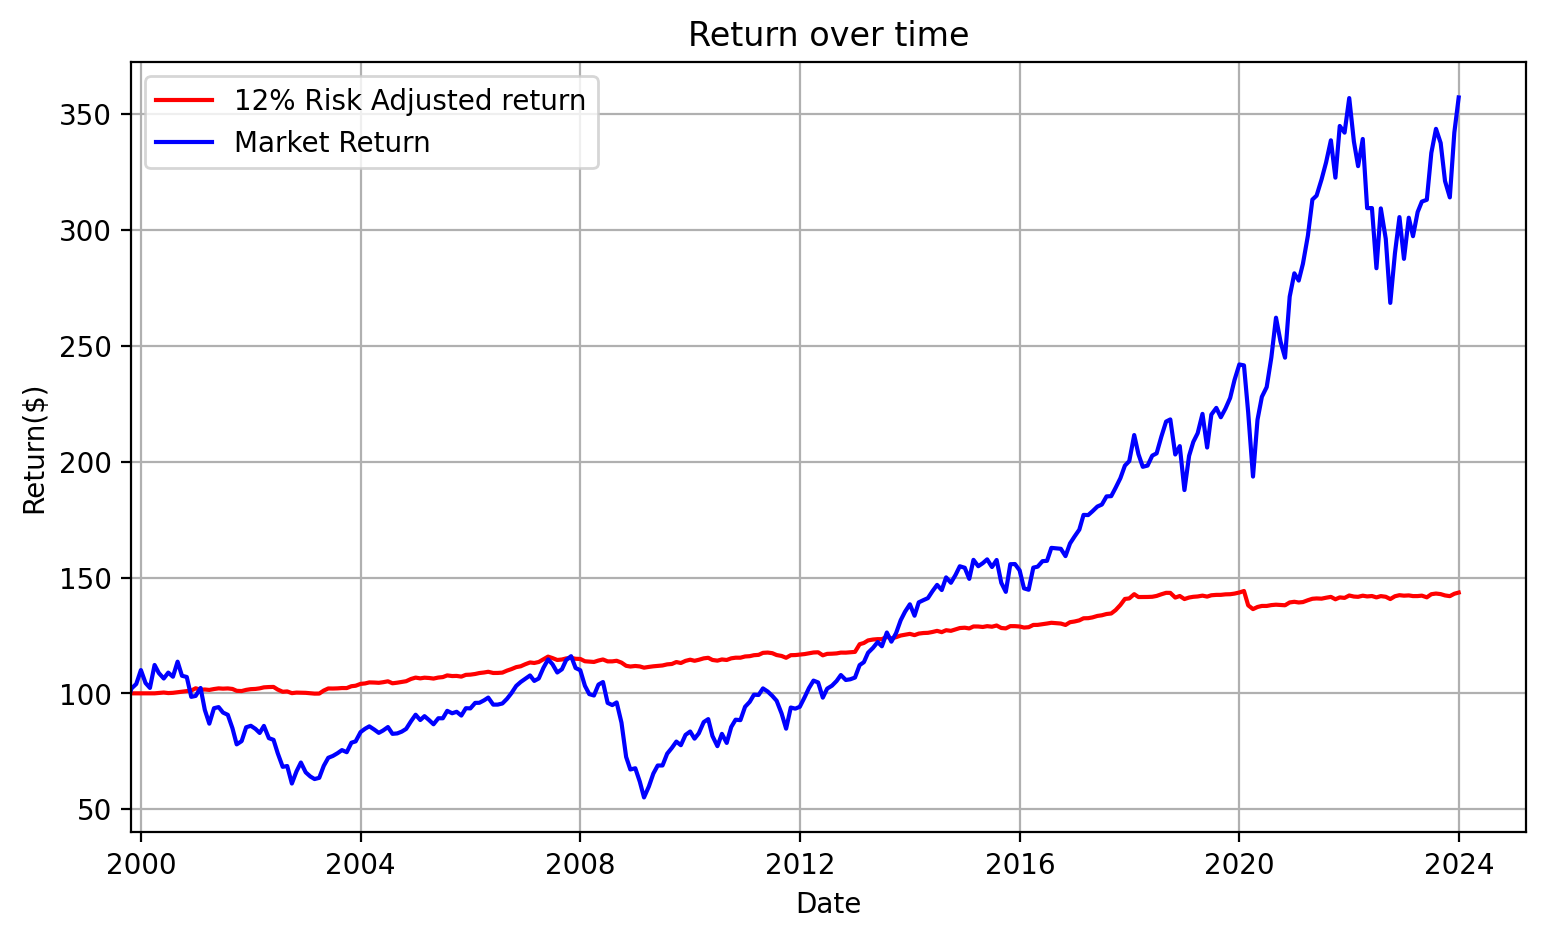

In [29]:
monthly_averages['risk'] = monthly_averages['port_ret'].rolling(window=6).std()
monthly_averages['vix_allocation']=(0.12/(monthly_averages['risk']*(252**0.5))) * 0.5 #half in cash and other half in portfolio.
monthly_averages['port_ret_ra']=monthly_averages['vix_allocation'].shift(1)*monthly_averages['port_ret'] 
print(monthly_averages[['port_ret', 'port_ret_ra']].describe())
monthly_averages['ra_eq2'] = 100


for i in range(12, len(monthly_averages)):
  monthly_averages.loc[monthly_averages.index[i], 'ra_eq2'] = monthly_averages.loc[monthly_averages.index[i-1], 'ra_eq2'] * (1 + monthly_averages.loc[monthly_averages.index[i], 'port_ret_ra'])

plt.figure(figsize=(9, 5))
plt.plot(monthly_averages.index, monthly_averages['ra_eq2'], label='12% Risk Adjusted return', color='red')
plt.plot(monthly_averages.index, monthly_averages['SpyE'], label='Market Return', color='blue')
plt.xlim(monthly_averages.index[6])
plt.title('Return over time')
plt.xlabel('Date')
plt.ylabel('Return($)')
plt.legend()
plt.grid(True)
plt.show()

